In [1]:
from IPython.display import display, HTML
from datetime import datetime

# Define the notebook title
Notebook_title = "House_Prices_Models"

# Get the current date
current_date = datetime.now().strftime("%B %d, %Y")

# Create the HTML string with title, date, and author
html_content = f"""
<h1 style="text-align:center;">{Notebook_title}</h1>
<br/>
<h3 style="text-align:left;">MikiasHWT</h3>
<h3 style="text-align:left;">{current_date}</h3>
"""

# Display the HTML content in the output
display(HTML(html_content))


# Prep Workplace

## Imports

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
from setuptools import distutils

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder

# To show multiple lines in output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Directories

In [3]:
# Directories = {
#     "datDir": "path/",
#     "outDir": "path/"
# }

# # Data Directory
# datDir = ""

# # View data
# os.listdir(datDir)

# # Output Directory
# outDir = ""

# # View outputs
# os.listdir(outDir)

# # Define required directories
# Directories = {
#     "datDir": "path/to/data",
#     "outDir": "path/to/output"
# }

# # Create directories (if they don't exist) & list contents
# for folder, path in Directories.items():
#     os.makedirs(path, exist_ok=True) 
#     print(f"Contents of {path}:")
#     print("\n".join(os.listdir(path))) 

# Background

## Motivation

## Data Source

In [4]:
DatDescriptionPath = 'data/data_description.txt'

# DatDescription = pd.read_csv('data/data_description.txt', delimiter=' ')


# Open and read the text file
with open(DatDescriptionPath, 'r') as file:
    content = file.read()

# Display the content
print(content)



MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# Import Data

In [5]:
# Define filepaths
iowa_file_path = 'data/train.csv'
test_data_path = 'data/test.csv'

# Read data files
HomeDat = pd.read_csv(iowa_file_path, index_col="Id")
TestDat = pd.read_csv(test_data_path, index_col="Id")


In [6]:
# Variable types
variable_types = HomeDat.dtypes

# Summary
variable_types.value_counts()

object     43
int64      34
float64     3
Name: count, dtype: int64

In [55]:
# Summary statistics: numerical variables
summary_stats = HomeDat.describe()

summary_stats

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Summary statistics: categorical variables
categorical_summary = HomeDat.describe(include='object')

categorical_summary


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


# Categorize Features
- Numerical Variables: Continuous and discrete numbers.
- Categorical Variables: Variables with distinct categories.
- Date/Time Variables: Variables representing dates or times (if applicable).
- Target Variable: The variable you are trying to predict.

In [9]:
# Separate numerical and categorical columns
numerical_columns = HomeDat.select_dtypes(include=['number']).columns
categorical_columns = HomeDat.select_dtypes(include=['object', 'category']).columns

print(f"Numerical columns: {numerical_columns} \n {len(numerical_columns)} columns total")
print(f"\nCategorical columns: {categorical_columns} \n {len(categorical_columns)} columns total")

Numerical columns: Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object') 
 37 columns total

Categorical columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure

In [10]:
# Separate predictor and outcome variables (using only numerical predictors for now)
X = HomeDat[numerical_columns.drop("SalePrice")]    
X.shape

y = HomeDat["SalePrice"]
y.shape

# Prep train and test data
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  train_size=0.8, 
                                                  random_state=42)

(1460, 36)

(1460,)

# Handle Missing Values
- Impute 
- Remove
- 

In [11]:
# Check for missing values
missing_values_all = HomeDat.isnull().sum().sort_values(ascending=False)
print(f"Number of missing values for all columns: \n{missing_values_all[missing_values_all> 0]}")

missing_numeric_values = X.isnull().sum().sort_values(ascending=False)
print(f"\nNumber of missing values for numeric columns: \n{missing_numeric_values[missing_numeric_values> 0]}")

Number of missing values for all columns: 
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageType        81
GarageFinish      81
GarageCond        81
GarageYrBlt       81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtFinType1      37
BsmtCond          37
MasVnrArea         8
Electrical         1
dtype: int64

Number of missing values for numeric columns: 
LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64


In [12]:
# Number of columns missing values
print(f"There are {(missing_numeric_values > 0).sum()} numerical variables containing NA's.")
print(f"For a total of {missing_numeric_values.sum()} missing numeric values.")


# Context
print(f"\nThe whole dataset has {(missing_values_all > 0).sum()} variables containing NA's. \nFor a sum total of {missing_values_all.sum()} missing values")
print(f"\nThe whole dataset contains {HomeDat.shape[0]} observations and {HomeDat.shape[1]} variables.")

There are 3 numerical variables containing NA's.
For a total of 348 missing numeric values.

The whole dataset has 19 variables containing NA's. 
For a sum total of 7829 missing values

The whole dataset contains 1460 observations and 80 variables.


In [13]:
# Function to compare various Random Forest models
def score_dataset(X_train, X_val, y_train, y_val):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    return mean_absolute_error(y_val, preds)

## Drop columns

In [14]:
# Names of columns with missing values
cols_with_nulls = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns missing values
reduced_X_train = X_train.drop(columns = cols_with_nulls, axis=1)
reduced_X_valid = X_val.drop(columns = cols_with_nulls, axis=1)

print(f"For one approach, we eliminate columns with NA values, reducing our datasets from {X_train.shape[1]} to {reduced_X_train.shape[1]} variables.")


For one approach, we eliminate columns with NA values, reducing our datasets from 36 to 33 variables.


In [15]:
print("MAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_val))

MAE (Drop columns with missing values):
17877.492979452054


## Impute values

In [16]:
# Create instance of imputer class
my_imputer = SimpleImputer()

# Impute missing values in train data with mean value of the column (mean = default)
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))

# Use train data mean to impute missing values in validation dataset (transform without fit for consistency)
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_val))

# Numpy array is returned without column names, return the names
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_val.columns

print("MAE from Approach 2 (SimpleImputer):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_val))

MAE from Approach 2 (SimpleImputer):
18107.82591324201


Results are worse for imputing values that dropping columns. 
This result can be expected depending on the nature of the dataset, the variables we imputed as well as how we chose to impute their values. 

eg: Missing values in GarageYrBlt (Year garage was built) variable could indicated the house doesn't have a garage. So imputing a mean could produce more noise in the dataset. In this case, an alternate approach may be warranted. 

### Garage Variables
- GarageYrBlt (Year garage was built)
- GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
- GarageYrBlt: Year garage was built
		
- GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
- GarageCars: Size of garage in car capacity

- GarageArea: Size of garage in square feet

- GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
- GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [17]:
# Extract garage related variables from full dataset
garage_columns = HomeDat.filter(like="Garage")[HomeDat['GarageYrBlt'].isnull()]

# Explore 
garage_columns.shape

print(f"These Garage related variables have the following number of NA values: \n{garage_columns.isnull().sum()}")



(81, 7)

These Garage related variables have the following number of NA values: 
GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCars       0
GarageArea       0
GarageQual      81
GarageCond      81
dtype: int64


In [18]:
# Consider value of GarageYrBlt columns
# HomeDat[["GarageYrBlt", "GarageArea", "YearBuilt", "YearRemodAdd"]]

HomeDat[["GarageYrBlt", "YearBuilt", "YearRemodAdd"]].describe()

# Correlation of potentially related variables
HomeDat[["GarageArea", "GarageYrBlt", "YearBuilt", "YearRemodAdd"]].corr()



,GarageYrBlt,YearBuilt,YearRemodAdd
count,1379.000000,1460.000000,1460.000000
mean,1978.506164,1971.267808,1984.865753
std,24.689725,30.202904,20.645407
min,1900.000000,1872.000000,1950.000000
25%,1961.000000,1954.000000,1967.000000
50%,1980.000000,1973.000000,1994.000000
75%,2002.000000,2000.000000,2004.000000
max,2010.000000,2010.000000,2010.000000


,GarageArea,GarageYrBlt,YearBuilt,YearRemodAdd
GarageArea,1.000000,0.564567,0.478954,0.371600
GarageYrBlt,0.564567,1.000000,0.825667,0.642277
YearBuilt,0.478954,0.825667,1.000000,0.592855
YearRemodAdd,0.371600,0.642277,0.592855,1.000000


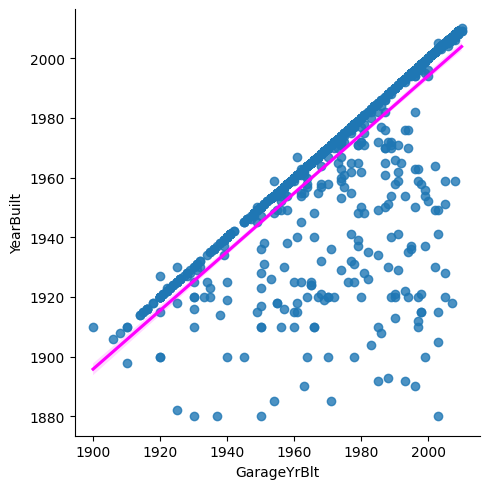

In [19]:
# Remove NaN values from the data
filtered_data = HomeDat[['GarageYrBlt', 'YearBuilt']]

# Scatter plot with best-fit line
sns.lmplot(x='GarageYrBlt', y='YearBuilt', data=filtered_data, line_kws={'color': 'magenta'})

# Show the plot
plt.show()


In [20]:
features_subset = HomeDat[["GarageYrBlt", "GarageArea", "YearBuilt", "YearRemodAdd"]]
target = HomeDat["SalePrice"]  # Replace 'SalePrice' with your target column

model = DecisionTreeRegressor()
model.fit(features_subset, target)

# Feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to view feature importance
importance_df = pd.DataFrame({
    'Feature': ["GarageYrBlt", "GarageArea", "YearBuilt", "YearRemodAdd"],
    'Importance': feature_importance
})

importance_df.sort_values(by="Importance", ascending=False)

DecisionTreeRegressor()

,Feature,Importance
1,GarageArea,0.430502
2,YearBuilt,0.391010
3,YearRemodAdd,0.100395
0,GarageYrBlt,0.078093


#### Decision: Drop GarageYrBlt Variable. 
- Comparing garage related variables, it seems null values in GarageYrBlt indicate homes without garages. This is evident by the area's given as 0 and by NA values for other columns.
- GarageYrBlt and YearBuilt are highly correlated (82%)
- Quick inspection of the importance of GarageYrBlt (relative to the 3 other) variable shows minimal significance of the variable to the Random Forest model created. (same with YearRemodAdd) 

### LotFrontage Variables (-ish)
- LotFrontage: Linear feet of street connected to property

- LotArea: Lot size in square feet
	
- LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
	
- LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

In [21]:
# Extract lot related variables from full dataset
lot_columns = HomeDat.filter(like="Lot")[HomeDat['LotFrontage'].isnull()]

lot_columns


,LotFrontage,LotArea,LotShape,LotConfig
Id,,,,
8,NaN,10382,IR1,Corner
13,NaN,12968,IR2,Inside
15,NaN,10920,IR1,Corner
17,NaN,11241,IR1,CulDSac
25,NaN,8246,IR1,Inside
...,...,...,...,...
1430,NaN,12546,IR1,Corner
1432,NaN,4928,IR1,Inside
1442,NaN,4426,Reg,Inside


In [22]:
# LotFrontage by LotConfig 
lotconfig_summary = HomeDat.groupby('LotConfig')['LotFrontage'].agg(
    Total_Instances='size',
    NA_Count=lambda x: x.isnull().sum(),
    Average_LotFrontage='mean'
)

# LotFrontage by LotShape
lotshape_summary = HomeDat.groupby('LotShape')['LotFrontage'].agg(
    Total_Instances='size',
    NA_Count=lambda x: x.isnull().sum(),
    Average_LotFrontage='mean'
)

# Display summaries
print("LotFrontage missing values and averages by LotConfig:")
print(lotconfig_summary)

print("\nLotFrontage missing values and averages by LotShape:")
print(lotshape_summary)

LotFrontage missing values and averages by LotConfig:
           Total_Instances  NA_Count  Average_LotFrontage
LotConfig                                                
Corner                 263        62            84.039801
CulDSac                 94        49            59.911111
FR2                     47        14            63.515152
FR3                      4         0            70.750000
Inside                1052       134            67.715686

LotFrontage missing values and averages by LotShape:
          Total_Instances  NA_Count  Average_LotFrontage
LotShape                                                
IR1                   484       167            76.094637
IR2                    41        15            76.500000
IR3                    10         3           138.428571
Reg                   925        74            67.038778


In [23]:
HomeDat[['LotFrontage', 'LotArea']].corr()

,LotFrontage,LotArea
LotFrontage,1.000000,0.426095
LotArea,0.426095,1.000000


<Figure size 1400x600 with 0 Axes>

Text(0.5, 1.0, 'LotArea vs LotFrontage by LotShape')

Text(0.5, 1.0, 'LotArea vs LotFrontage by LotConfig')

<Figure size 1400x600 with 0 Axes>

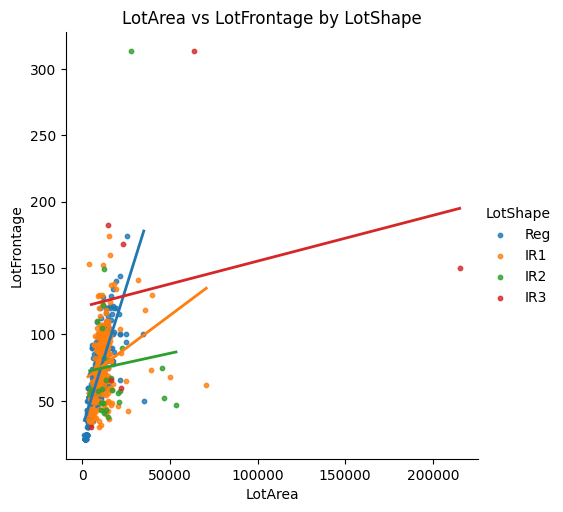

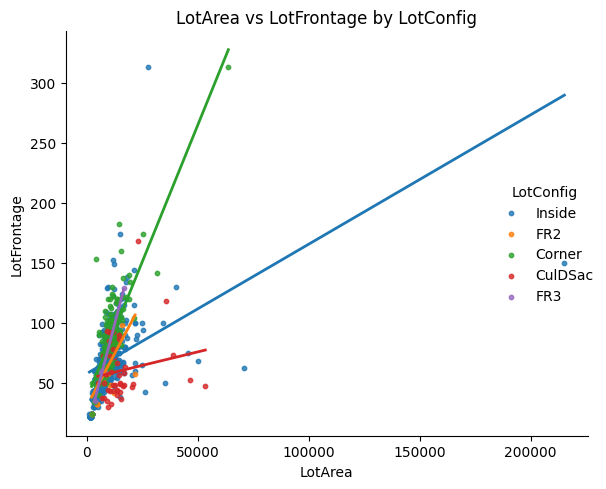

In [24]:
# Create a figure and adjust its size
plt.figure(figsize=(14, 6))

# Plot 1: Scatter plot with best-fit lines colored by LotShape
sns.lmplot(x='LotArea', y='LotFrontage', hue='LotShape', data=HomeDat, scatter_kws={'s': 10}, line_kws={'linewidth': 2}, ci=None)
plt.title('LotArea vs LotFrontage by LotShape')

# Plot 2: Scatter plot with best-fit lines colored by LotConfig
sns.lmplot(x='LotArea', y='LotFrontage', hue='LotConfig', data=HomeDat, scatter_kws={'s': 10}, line_kws={'linewidth': 2}, ci=None)
plt.title('LotArea vs LotFrontage by LotConfig')

# Adjust layout of plots (shown in Jupyter Notebook)
plt.tight_layout()
plt.show()

In [25]:
features_subset2 = HomeDat[['LotFrontage', 'LotArea']]
target = HomeDat["SalePrice"]  # Replace 'SalePrice' with your target column

model = DecisionTreeRegressor()
model.fit(features_subset2, target)

# Feature importance
feature_importance2 = model.feature_importances_

# Create a DataFrame to view feature importance
importance_df2 = pd.DataFrame({
    'Feature': ['LotFrontage', 'LotArea'],
    'Importance': feature_importance2
})

importance_df2.sort_values(by="Importance", ascending=False)

DecisionTreeRegressor()

,Feature,Importance
1,LotArea,0.680086
0,LotFrontage,0.319914


In [26]:
features_subset3 = HomeDat[numerical_columns.drop("SalePrice")] 
target = HomeDat["SalePrice"]  # Replace 'SalePrice' with your target column

model = DecisionTreeRegressor()
model.fit(features_subset3, target)

# Feature importance
feature_importance3 = model.feature_importances_

# Create a DataFrame to view feature importance
importance_df3 = pd.DataFrame({
    'Feature': numerical_columns.drop("SalePrice"),
    'Importance': feature_importance3
})

importance_df3.sort_values(by="Importance", ascending=False)

DecisionTreeRegressor()

,Feature,Importance
3,OverallQual,0.640835
15,GrLivArea,0.099674
13,2ndFlrSF,0.040580
11,TotalBsmtSF,0.030065
25,GarageCars,0.024955
12,1stFlrSF,0.023296
8,BsmtFinSF1,0.022801
1,LotFrontage,0.014512
5,YearBuilt,0.013922
26,GarageArea,0.012988


#### Decision: Impute LotFrontage with median values
- I see no obvious patters to lead me to impute a category specific value for LotFrontage
- I see no strong patterns between lot variables and missing LotFrontage values
- I am not convinced that LotFrontage is insignificant enough to discard
- I believe imputing with a median value will cause the least induction of noise, while preserving the potentially utility of LotFrontage variable. 

### MasVnrArea Variables

- MasVnrArea: Masonry veneer area in square feet

- MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone


In [27]:
# Extract garage related variables from full dataset
veneer_columns = HomeDat.filter(like="Vnr")[(HomeDat['MasVnrArea'].isnull()) | (HomeDat['MasVnrType'] == "None")]

# Explore 
veneer_columns

# Count instances of each value in MasVnrType
mas_vnr_type_counts = HomeDat['MasVnrType'].value_counts()

# Display the counts
print(mas_vnr_type_counts)

,MasVnrType,MasVnrArea
Id,,
235,NaN,NaN
530,NaN,NaN
651,NaN,NaN
937,NaN,NaN
974,NaN,NaN
978,NaN,NaN
1244,NaN,NaN
1279,NaN,NaN


MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64


#### Decision: Impute MasVnrArea with 0
- The instances of MasVnrType are missing CinderBlock and None. I believe in this case, it is fair to assume there is no masonry for these observations and impute a value of zero in their stead. 

# Predictor subsets

In [28]:
# Drop GarageYrBlt column 
X_train_sub1 = X_train.drop(columns = "GarageYrBlt", axis=1)
X_valid_sub1 = X_val.drop(columns = "GarageYrBlt", axis=1)

# Compare
print(f"Original data shape:{X_train.shape}. \nReduced data shape:{X_train_sub1.shape}")

Original data shape:(1168, 36). 
Reduced data shape:(1168, 35)


In [29]:
# Copy data
X_train_sub1_alt = X_train.copy()
X_valid_sub1_alt = X_val.copy()

# Create impute key (1 = imputed, 0 = not imputed) for training and validation sets
X_train_sub1_alt['GarageYrBlt_Imputed'] = X_train_sub1_alt['GarageYrBlt'].isnull().astype(int)
X_valid_sub1_alt['GarageYrBlt_Imputed'] = X_valid_sub1_alt['GarageYrBlt'].isnull().astype(int)

# Impute missing GarageYrBlt with corresponding YearBuilt in training and validation sets
X_train_sub1_alt['GarageYrBlt'] = X_train_sub1_alt['GarageYrBlt'].fillna(X_train_sub1_alt['YearBuilt'])
X_valid_sub1_alt['GarageYrBlt'] = X_valid_sub1_alt['GarageYrBlt'].fillna(X_valid_sub1_alt['YearBuilt'])

# Show impact of imputed variable (training data)
print(pd.concat([X_train['GarageYrBlt'].describe(), X_train_sub1_alt['GarageYrBlt'].describe()], axis=1).round(2).set_axis(['Original GarageYrBlt', 'Imputed GarageYrBlt'], axis=1))

# Print the impact on NAN values
print(f"\n{X_train['GarageYrBlt'].isnull().sum()} previously missing values have been imputed using YearBuilt")

# Print shape of original and imputed data
print(f"\nOriginal data shape: {X_train.shape}. \nImputed data shape: {X_train_sub1_alt.shape}")

       Original GarageYrBlt  Imputed GarageYrBlt
count               1104.00              1168.00
mean                1978.66              1976.56
std                   24.73                26.53
min                 1900.00              1872.00
25%                 1961.75              1959.00
50%                 1980.00              1978.00
75%                 2002.00              2001.00
max                 2010.00              2010.00

64 previously missing values have been imputed using YearBuilt

Original data shape: (1168, 36). 
Imputed data shape: (1168, 37)


In [30]:
# Copy data
X_train_sub2 = X_train_sub1.copy()
X_valid_sub2 = X_valid_sub1.copy()

# Median LofFrontage
lot_frontage_median = X_train_sub2['LotFrontage'].median()

# Create impute key (1 = imputed, 0 = not imputed) 
X_train_sub2['LotFrontage_Imputed'] = X_train_sub2['LotFrontage'].isnull().astype(int)
X_valid_sub2['LotFrontage_Imputed'] = X_valid_sub2['LotFrontage'].isnull().astype(int)

# Impute missing LotFrontage with median
X_train_sub2['LotFrontage'] = X_train_sub2['LotFrontage'].fillna(lot_frontage_median)
X_valid_sub2['LotFrontage'] = X_valid_sub2['LotFrontage'].fillna(lot_frontage_median)

# Show impact of imputed variable
print(pd.concat([X_train_sub1['LotFrontage'].describe(), X_train_sub2['LotFrontage'].describe()], axis=1).round(2).set_axis(['Original LotFrontage', 'Median Imputed LotFrontage'], axis=1))

print(f"\n{X_train['LotFrontage'].isnull().sum()} previously NAN values added to imputed counts, with minimal impact on other statistics")
print(f"\nOriginal data shape:{X_train_sub1.shape}. \nImputed data shape:{X_train_sub2.shape}")

       Original LotFrontage  Median Imputed LotFrontage
count                951.00                     1168.00
mean                  70.34                       70.28
std                   24.90                       22.46
min                   21.00                       21.00
25%                   59.00                       60.00
50%                   70.00                       70.00
75%                   80.00                       79.00
max                  313.00                      313.00

217 previously NAN values added to imputed counts, with minimal impact on other statistics

Original data shape:(1168, 35). 
Imputed data shape:(1168, 36)


In [31]:
# Copy data
X_train_sub2_alt = X_train_sub1_alt.copy()
X_valid_sub2_alt = X_valid_sub1_alt.copy()

# Median LofFrontage
lot_frontage_median = X_train_sub2_alt['LotFrontage'].median()

# Create impute key (1 = imputed, 0 = not imputed) 
X_train_sub2_alt['LotFrontage_Imputed'] = X_train_sub2_alt['LotFrontage'].isnull().astype(int)
X_valid_sub2_alt['LotFrontage_Imputed'] = X_valid_sub2_alt['LotFrontage'].isnull().astype(int)

# Impute missing LotFrontage with median
X_train_sub2_alt['LotFrontage'] = X_train_sub2_alt['LotFrontage'].fillna(lot_frontage_median)
X_valid_sub2_alt['LotFrontage'] = X_valid_sub2_alt['LotFrontage'].fillna(lot_frontage_median)

# Show impact of imputed variable
print(pd.concat([X_train_sub1_alt['LotFrontage'].describe(), X_train_sub2_alt['LotFrontage'].describe()], axis=1).round(2).set_axis(['Original LotFrontage', 'Median Imputed LotFrontage'], axis=1))

print(f"\n{X_train['LotFrontage'].isnull().sum()} previously NAN values added to imputed counts, with minimal impact on other statistics")
print(f"\nOriginal data shape:{X_train_sub1_alt.shape}. \nImputed data shape:{X_train_sub2_alt.shape}")

       Original LotFrontage  Median Imputed LotFrontage
count                951.00                     1168.00
mean                  70.34                       70.28
std                   24.90                       22.46
min                   21.00                       21.00
25%                   59.00                       60.00
50%                   70.00                       70.00
75%                   80.00                       79.00
max                  313.00                      313.00

217 previously NAN values added to imputed counts, with minimal impact on other statistics

Original data shape:(1168, 37). 
Imputed data shape:(1168, 38)


In [32]:
# Copy data
X_train_Lot = X_train.copy()
X_valid_Lot = X_val.copy()

# Median LofFrontage
lot_frontage_median = X_train_Lot['LotFrontage'].median()

# Create impute key (1 = imputed, 0 = not imputed) 
X_train_Lot['LotFrontage_Imputed'] = X_train_Lot['LotFrontage'].isnull().astype(int)
X_valid_Lot['LotFrontage_Imputed'] = X_valid_Lot['LotFrontage'].isnull().astype(int)

# Impute missing LotFrontage with median
X_train_Lot['LotFrontage'] = X_train_Lot['LotFrontage'].fillna(lot_frontage_median)
X_valid_Lot['LotFrontage'] = X_valid_Lot['LotFrontage'].fillna(lot_frontage_median)

# Show impact of imputed variable
print(pd.concat([X_train['LotFrontage'].describe(), X_train_Lot['LotFrontage'].describe()], axis=1).round(2).set_axis(['Original LotFrontage', 'Median Imputed LotFrontage'], axis=1))

print(f"\n{X_train['LotFrontage'].isnull().sum()} previously NAN values added to imputed counts, with minimal impact on other statistics")
print(f"\nOriginal data shape:{X_train.shape}. \nImputed data shape:{X_train_Lot.shape}")

       Original LotFrontage  Median Imputed LotFrontage
count                951.00                     1168.00
mean                  70.34                       70.28
std                   24.90                       22.46
min                   21.00                       21.00
25%                   59.00                       60.00
50%                   70.00                       70.00
75%                   80.00                       79.00
max                  313.00                      313.00

217 previously NAN values added to imputed counts, with minimal impact on other statistics

Original data shape:(1168, 36). 
Imputed data shape:(1168, 37)


In [33]:
# Copy data
X_train_Lot_nokey = X_train.copy()
X_valid_Lot_nokey = X_val.copy()

# Median LofFrontage
lot_frontage_median = X_train_Lot_nokey['LotFrontage'].median()

# Impute missing LotFrontage with median
X_train_Lot_nokey['LotFrontage'] = X_train_Lot_nokey['LotFrontage'].fillna(lot_frontage_median)
X_valid_Lot_nokey['LotFrontage'] = X_valid_Lot_nokey['LotFrontage'].fillna(lot_frontage_median)

# Show impact of imputed variable
print(pd.concat([X_train['LotFrontage'].describe(), X_train_Lot_nokey['LotFrontage'].describe()], axis=1).round(2).set_axis(['Original LotFrontage', 'Median Imputed LotFrontage'], axis=1))

print(f"\n{X_train['LotFrontage'].isnull().sum()} previously NAN values added to imputed counts, with minimal impact on other statistics")
print(f"\nOriginal data shape:{X_train.shape}. \nImputed data shape:{X_train_Lot_nokey.shape}")

       Original LotFrontage  Median Imputed LotFrontage
count                951.00                     1168.00
mean                  70.34                       70.28
std                   24.90                       22.46
min                   21.00                       21.00
25%                   59.00                       60.00
50%                   70.00                       70.00
75%                   80.00                       79.00
max                  313.00                      313.00

217 previously NAN values added to imputed counts, with minimal impact on other statistics

Original data shape:(1168, 36). 
Imputed data shape:(1168, 36)


In [57]:
# Copy data
X_train_Lot0_nokey = X_train.copy()
X_valid_Lot0_nokey = X_val.copy()

# Impute missing values in MasVnrArea with 0
X_train_Lot0_nokey['LotFrontage'] = X_train_Lot0_nokey['LotFrontage'].fillna(0)
X_valid_Lot0_nokey['LotFrontage'] = X_valid_Lot0_nokey['LotFrontage'].fillna(0)

# Show impact
print(pd.concat([X_train['LotFrontage'].describe(), X_train_Lot0_nokey['LotFrontage'].describe()], axis=1).round(2).set_axis(['Original LotFrontage', 'Zero Imputed LotFrontage'], axis=1))

print(f"\n{X_train['LotFrontage'].isnull().sum()} previously NAN values added to imputed counts")
print(f"\nOriginal data shape:{X_train.shape}. \nImputed data shape:{X_train_Lot0_nokey.shape}")

       Original LotFrontage  Zero Imputed LotFrontage
count                951.00                   1168.00
mean                  70.34                     57.27
std                   24.90                     35.41
min                   21.00                      0.00
25%                   59.00                     40.00
50%                   70.00                     63.00
75%                   80.00                     79.00
max                  313.00                    313.00

217 previously NAN values added to imputed counts

Original data shape:(1168, 36). 
Imputed data shape:(1168, 36)


In [34]:
# Copy data
X_train_sub3 = X_train_sub2.copy()
X_valid_sub3 = X_valid_sub2.copy()

# Create imputation key (1 = imputed, 0 = not imputed)
X_train_sub3['MasVnrArea_Imputed'] = X_train_sub3['MasVnrArea'].isnull().astype(int)
X_valid_sub3['MasVnrArea_Imputed'] = X_valid_sub3['MasVnrArea'].isnull().astype(int)

# Impute missing values in MasVnrArea with 0
X_train_sub3['MasVnrArea'] = X_train_sub3['MasVnrArea'].fillna(0)
X_valid_sub3['MasVnrArea'] = X_valid_sub3['MasVnrArea'].fillna(0)

# Show impact
print(pd.concat([X_train_sub2['MasVnrArea'].describe(), X_train_sub3['MasVnrArea'].describe()], axis=1).round(2).set_axis(['Original MasVnrArea', 'Zero Imputed MasVnrArea'], axis=1))

print(f"\n{X_train['MasVnrArea'].isnull().sum()} previously NAN values added to imputed counts, with minimal impact on other statistics")
print(f"\nOriginal data shape:{X_train_sub2.shape}. \nImputed data shape:{X_train_sub3.shape}")

       Original MasVnrArea  Zero Imputed MasVnrArea
count              1162.00                  1168.00
mean                103.77                   103.24
std                 173.03                   172.75
min                   0.00                     0.00
25%                   0.00                     0.00
50%                   0.00                     0.00
75%                 166.00                   166.00
max                1378.00                  1378.00

6 previously NAN values added to imputed counts, with minimal impact on other statistics

Original data shape:(1168, 36). 
Imputed data shape:(1168, 37)


In [35]:
# Copy data
X_train_sub3_alt = X_train_sub2_alt.copy()
X_valid_sub3_alt = X_valid_sub2_alt.copy()

# Create imputation key (1 = imputed, 0 = not imputed)
X_train_sub3_alt['MasVnrArea_Imputed'] = X_train_sub3_alt['MasVnrArea'].isnull().astype(int)
X_valid_sub3_alt['MasVnrArea_Imputed'] = X_valid_sub3_alt['MasVnrArea'].isnull().astype(int)

# Impute missing values in MasVnrArea with 0
X_train_sub3_alt['MasVnrArea'] = X_train_sub3_alt['MasVnrArea'].fillna(0)
X_valid_sub3_alt['MasVnrArea'] = X_valid_sub3_alt['MasVnrArea'].fillna(0)

# Show impact
print(pd.concat([X_train_sub2_alt['MasVnrArea'].describe(), X_train_sub3_alt['MasVnrArea'].describe()], axis=1).round(2).set_axis(['Original MasVnrArea', 'Zero Imputed MasVnrArea'], axis=1))

print(f"\n{X_train['MasVnrArea'].isnull().sum()} previously NAN values added to imputed counts, with minimal impact on other statistics")
print(f"\nOriginal data shape:{X_train_sub2_alt.shape}. \nImputed data shape:{X_train_sub3_alt.shape}")

       Original MasVnrArea  Zero Imputed MasVnrArea
count              1162.00                  1168.00
mean                103.77                   103.24
std                 173.03                   172.75
min                   0.00                     0.00
25%                   0.00                     0.00
50%                   0.00                     0.00
75%                 166.00                   166.00
max                1378.00                  1378.00

6 previously NAN values added to imputed counts, with minimal impact on other statistics

Original data shape:(1168, 38). 
Imputed data shape:(1168, 39)


In [36]:
# Copy data
X_train_Vnr = X_train.copy()
X_valid_Vnr = X_val.copy()

# Create imputation key (1 = imputed, 0 = not imputed)
X_train_Vnr['MasVnrArea_Imputed'] = X_train_Vnr['MasVnrArea'].isnull().astype(int)
X_valid_Vnr['MasVnrArea_Imputed'] = X_valid_Vnr['MasVnrArea'].isnull().astype(int)

# Impute missing values in MasVnrArea with 0
X_train_Vnr['MasVnrArea'] = X_train_Vnr['MasVnrArea'].fillna(0)
X_valid_Vnr['MasVnrArea'] = X_valid_Vnr['MasVnrArea'].fillna(0)

# Show impact
print(pd.concat([X_train['MasVnrArea'].describe(), X_train_Vnr['MasVnrArea'].describe()], axis=1).round(2).set_axis(['Original MasVnrArea', 'Zero Imputed MasVnrArea'], axis=1))

print(f"\n{X_train['MasVnrArea'].isnull().sum()} previously NAN values added to imputed counts, with minimal impact on other statistics")
print(f"\nOriginal data shape:{X_train.shape}. \nImputed data shape:{X_train_Vnr.shape}")

       Original MasVnrArea  Zero Imputed MasVnrArea
count              1162.00                  1168.00
mean                103.77                   103.24
std                 173.03                   172.75
min                   0.00                     0.00
25%                   0.00                     0.00
50%                   0.00                     0.00
75%                 166.00                   166.00
max                1378.00                  1378.00

6 previously NAN values added to imputed counts, with minimal impact on other statistics

Original data shape:(1168, 36). 
Imputed data shape:(1168, 37)


In [37]:
# Copy data
X_train_Vnr_nokey = X_train.copy()
X_valid_Vnr_nokey = X_val.copy()

# Impute missing values in MasVnrArea with 0
X_train_Vnr_nokey['MasVnrArea'] = X_train_Vnr_nokey['MasVnrArea'].fillna(0)
X_valid_Vnr_nokey['MasVnrArea'] = X_valid_Vnr_nokey['MasVnrArea'].fillna(0)

# Show impact
print(pd.concat([X_train['MasVnrArea'].describe(), X_train_Vnr_nokey['MasVnrArea'].describe()], axis=1).round(2).set_axis(['Original MasVnrArea', 'Zero Imputed MasVnrArea'], axis=1))

print(f"\n{X_train['MasVnrArea'].isnull().sum()} previously NAN values added to imputed counts, with minimal impact on other statistics")
print(f"\nOriginal data shape:{X_train.shape}. \nImputed data shape:{X_train_Vnr_nokey.shape}")

       Original MasVnrArea  Zero Imputed MasVnrArea
count              1162.00                  1168.00
mean                103.77                   103.24
std                 173.03                   172.75
min                   0.00                     0.00
25%                   0.00                     0.00
50%                   0.00                     0.00
75%                 166.00                   166.00
max                1378.00                  1378.00

6 previously NAN values added to imputed counts, with minimal impact on other statistics

Original data shape:(1168, 36). 
Imputed data shape:(1168, 36)


In [58]:
print("MAE from Approach: Original")
print(score_dataset(X_train, X_val, y_train, y_val))

print("\nMAE (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_val))

print("\nMAE from Approach 2 (SimpleImputer):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_val))

print("______________________________________________________________________")

print("\nMAE from Approach: GarageYrBlt Dropped")
print(score_dataset(X_train_sub1, X_valid_sub1, y_train, y_val))

print("\nMAE from Approach: Mediain Imputed LotFrontage with key")
print(score_dataset(X_train_sub2, X_valid_sub2, y_train, y_val))

print("\nMAE from Approach: Zero Imputed MasVnrArea with key")
print(score_dataset(X_train_sub3, X_valid_sub3, y_train, y_val))

print("______________________________________________________________________")

print("\nMAE from Alt Approach: YearBlt Imputed GarageYrBlt with key")
print(score_dataset(X_train_sub1_alt, X_valid_sub1_alt, y_train, y_val))

print("\nMAE from Alt Approach: Mediain Imputed LotFrontage with key")
print(score_dataset(X_train_sub2_alt, X_valid_sub2_alt, y_train, y_val))

print("\nMAE from Alt Approach: Zero Imputed MasVnrArea with key")
print(score_dataset(X_train_sub3_alt, X_valid_sub3_alt, y_train, y_val))

print("______________________________________________________________________")

print("\nMAE from Lot Only Approach: Mediain Imputed LotFrontage with key")
print(score_dataset(X_train_Lot, X_valid_Lot, y_train, y_val))

print("\nMAE from Vnr Only Approach: Zero Imputed MasVnrArea with key")
print(score_dataset(X_train_Vnr, X_valid_Vnr, y_train, y_val))

print("______________________________________________________________________")

print("\nMAE from Lot Only NO-KEY Approach: Mediain Imputed LotFrontage without key")
print(score_dataset(X_train_Lot_nokey, X_valid_Lot_nokey, y_train, y_val))

print("\nMAE from Lot Only NO-KEY Approach: Zero Imputed LotFrontage without key")
print(score_dataset(X_train_Lot0_nokey, X_valid_Lot0_nokey, y_train, y_val))

print("\nMAE from Vnr Only NO-KEY Approach: Zero Imputed MasVnrArea with key")
print(score_dataset(X_train_Vnr_nokey, X_valid_Vnr_nokey, y_train, y_val))



MAE from Approach: Original
17983.22339041096

MAE (Drop columns with missing values):
17877.492979452054

MAE from Approach 2 (SimpleImputer):
18107.82591324201
______________________________________________________________________

MAE from Approach: GarageYrBlt Dropped
18143.728926940643

MAE from Approach: Mediain Imputed LotFrontage with key
18073.72703196347

MAE from Approach: Zero Imputed MasVnrArea with key
18061.178162100456
______________________________________________________________________

MAE from Alt Approach: YearBlt Imputed GarageYrBlt with key
18008.879543378996

MAE from Alt Approach: Mediain Imputed LotFrontage with key
18131.992831050226

MAE from Alt Approach: Zero Imputed MasVnrArea with key
18169.942351598173
______________________________________________________________________

MAE from Lot Only Approach: Mediain Imputed LotFrontage with key
18083.025114155254

MAE from Vnr Only Approach: Zero Imputed MasVnrArea with key
18141.239611872148
_________________

# Categorical Variables
- Drop variables
- Ordinal Variables: 1-N per tier of ordered categorical variable (Ordinal encoding)
- Nominal Variable: one column of binary options per tier of categorical variable (one-hot encoding)


In [ ]:
# # Drop columns with missing values (simplest approach)
# cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()] 
# X_train.drop(cols_with_missing, axis=1, inplace=True)
# X_valid.drop(cols_with_missing, axis=1, inplace=True)

# # "Cardinality" means the number of unique values in a column
# # Select categorical columns with relatively low cardinality (convenient but arbitrary)
# low_cardinality_cols = [cname for cname in X_train.columns if X_train[cname].nunique() < 10 and X_train[cname].dtype == "object"]


# # Select numerical columns
# numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

# # Keep selected columns only
# my_cols = low_cardinality_cols + numerical_cols
# X_train = X_train_full[my_cols].copy()
# X_valid = X_valid_full[my_cols].copy()

# # Get list of categorical variables
# s = (X_train.dtypes == 'object')
# object_cols = list(s[s].index)

# print("Categorical variables:")
# print(object_cols)

## Drop

In [ ]:
# Drop
drop_X_train = X_train.select_dtypes(exclude=['object'])
drop_X_valid = X_valid.select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

## Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Ordinal Encoding

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

print("MAE from Approach 2 (Ordinal Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

## One-Hot Encoding

In [39]:
# Fill missing values
# Fill with mean        
# HomeDat[numerical_columns] = HomeDat[numerical_columns].fillna(HomeDat[numerical_columns].mean())

# Fill with specfied value      
# HomeDat[categorical_columns] = HomeDat[categorical_columns].fillna("Unknown")

# Transform Categorical Variables
- One-hot encoding
- Label encoding

In [40]:
# # Convert categorical variables using one-hot encoding or label encoding
# HomeDat_encoded = pd.get_dummies(HomeDat[categorical_columns], drop_first=True)

# Scale Numerical Variables
- Standardization
- Normalization

In [41]:
# # Initialize a scaler and fit_transform the numerical columns
# scaler = StandardScaler()
# HomeDat_scaled = pd.DataFrame(scaler.fit_transform(HomeDat[numerical_columns]), columns=numerical_columns)


# Outliers and Skewness
- In numerical variables

In [42]:
# # Check skewness
# skewness = HomeDat[numerical_columns].skew()
# print(f"Skewness in numerical columns: \n{skewness}")

In [43]:
# # Pseudolog Transformation
# for col in numerical_columns:
#     if abs(skewness[col]) > 1:
#         HomeDat_scaled[col] = np.log1p(HomeDat_scaled[col])

In [44]:
# # Combine Processed Data
# # Combine the scaled numerical and encoded categorical columns
# HomeDat_prepared = pd.concat([HomeDat_scaled, HomeDat_encoded], axis=1)

In [45]:
# # Predictor and outcome vaiarbles
# X = HomeDat_prepared.drop(columns=['SalePrice'])
# y = HomeDat['SalePrice']

# Feature Engineering

In [46]:
# # Example of interaction features: Square footage * number of rooms
# HomeDat['TotalRooms_SquareFootage'] = HomeDat['TotRmsAbvGrd'] * HomeDat['GrLivArea']

# # Example of polynomial features: Adding squares of features
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree=2, include_bias=False)
# poly_features = poly.fit_transform(HomeDat[['GrLivArea', 'LotArea']])

# # Convert to DataFrame and join with original dataset
# poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['GrLivArea', 'LotArea']))
# HomeDat = HomeDat.join(poly_df)

# # Log transform a highly skewed feature (e.g., LotArea)
# HomeDat['LotArea_Log'] = np.log1p(HomeDat['LotArea'])

# Feature Selection

In [47]:
# # Correlation matrix
# corr_matrix = HomeDat.corr()

# # Visualize the correlation matrix
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')
# plt.show()

# # Keep features with high correlation to SalePrice (e.g., above 0.5)
# high_corr_features = corr_matrix.index[corr_matrix['SalePrice'].abs() > 0.5]
# print(f"Highly correlated features with SalePrice: {high_corr_features}")

In [48]:
# # Prepare features and target
# X = HomeDat.drop(columns=['SalePrice'])  # Remove the target variable
# y = HomeDat['SalePrice']

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a RandomForest model to get feature importance
# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(X_train, y_train)

# # Get feature importance
# feature_importance = pd.DataFrame({
#     'Feature': X_train.columns,
#     'Importance': rf.feature_importances_
# }).sort_values(by='Importance', ascending=False)

# # Display the top 10 most important features
# print(feature_importance.head(10))

# # Visualize feature importance
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
# plt.title('Top 10 Important Features')
# plt.show()


In [49]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression

# # Initialize a model (Linear Regression, but can use others)
# model = LinearRegression()

# # Recursive Feature Elimination
# rfe = RFE(estimator=model, n_features_to_select=10)  # Select top 10 features
# rfe.fit(X_train, y_train)

# # Get the selected features
# selected_features = X_train.columns[rfe.support_]
# print(f"Selected features: {selected_features}")


In [50]:
# from sklearn.feature_selection import SelectKBest, f_regression

# # Select the top 10 features based on correlation with SalePrice
# select_k_best = SelectKBest(score_func=f_regression, k=10)
# fit = select_k_best.fit(X_train, y_train)

# # Get the selected features
# best_features = X_train.columns[select_k_best.get_support()]
# print(f"Top 10 best features: {best_features}")


In [51]:
# # Multicolinearity

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# # Calculate VIF for each feature
# vif = pd.DataFrame()
# vif["Features"] = X.columns
# vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# print(vif)

In [52]:
# # Dimensionality Reduction
# from sklearn.decomposition import PCA

# pca = PCA(n_components=10)
# X_pca = pca.fit_transform(X)


Create X by selecting numerical predictors:

    - features = home_data.select_dtypes(exclude=['object', 'category']).drop(columns=['SalePrice', 'Id']).columns
    - features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

Select columns corresponding to features, and preview the data:

    - X = home_data[features]

Split into validation and training data:

    - train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

Define a random forest model:

    - rf_model = RandomForestRegressor(random_state=1)
    - rf_model.fit(train_X, train_y)
    - rf_val_predictions = rf_model.predict(val_X)
    - rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

    - print("Validation MAE for Random Forest Model: {:,.0f}".format(rf_val_mae))

# Wrangle Data

explain

# Explore Data

explain

# Analyze Data

explain

# Conclusions

## Discoveries

explain

## Future Directions

explain

# End

## Show Session Information

In [53]:
import session_info
session_info.show()

## Save Session Requirements

In [54]:
# Replace spaces in notebook title with underscores
filename = Notebook_title.replace(" ", "_") + "_requirements.txt"

# Run the pip freeze command and save the output txt file
!pip freeze > $filename